<a href="https://colab.research.google.com/github/tbenesi/My-Python-Projects/blob/master/Laptop_Price_Predictor_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Basic Dependencies

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data and See First Rows

In [267]:
# Read in the data
df = pd.read_csv('laptop_data.csv')
# See first 10 rows of data
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## List the Column Names

In [268]:
# Print the column names
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [269]:
df.rename(columns={'TypeName': 'Type_Name', 'ScreenResolution': 'Screen_Resolution',
                  'Cpu':'CPU', 'Ram':'RAM', 'Gpu':'GPU', 'OpSys':'Operating_System'}, inplace=True)

## Drop the Unwanted Columns

In [270]:
# Removing the 'unnamed: 0' column
df = df.drop(['Unnamed: 0'], axis=1)
# See the first few rows
df.head()

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Check the Data Types and Missing Values

In [271]:
# See the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Type_Name          1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Screen_Resolution  1303 non-null   object 
 4   CPU                1303 non-null   object 
 5   RAM                1303 non-null   object 
 6   Memory             1303 non-null   object 
 7   GPU                1303 non-null   object 
 8   Operating_System   1303 non-null   object 
 9   Weight             1303 non-null   object 
 10  Price              1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [272]:
# Check for Outliers
df.isnull().sum()

Company              0
Type_Name            0
Inches               0
Screen_Resolution    0
CPU                  0
RAM                  0
Memory               0
GPU                  0
Operating_System     0
Weight               0
Price                0
dtype: int64

## Check duplicated Files

In [273]:
# Checking for duplicated rows
print(f"Sum of duplicated rows: {df.duplicated().sum()}")

Sum of duplicated rows: 29


In [274]:
# Check the list of duplicated rows
df.loc[df.duplicated()]


,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    

def valuecounts(col):
    counts = df[col].value_counts(normalize=True).mul(100).round(1)
    counts = counts.astype(str) + "%"  # Modify counts to contain the percentage string
    print(f'Class Frequencies of {col} is : {counts}')


for col in cat_vars:
    valuecounts(col)
    print("-" * 75)
    plt.show()

In [275]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


## Feature Engineering

In [276]:
df.head()

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Company: 'Company'

In [277]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

##### Nothing Wrong with Company Except to group small frequency companies to a group 'Other'

### Laptop Type: 'Type_Name'

In [278]:
df.Type_Name.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: Type_Name, dtype: int64

##### The 'Type_Name' variable is fine.

### Operating System: 'Operating_System'

In [279]:
df.Operating_System.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: Operating_System, dtype: int64

###### Combine all windows OS into one group and MAC OS as well

In [280]:
def classify_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'macOS' in os or 'Mac OS X' in os:
        return 'Mac OS'
    else:
        return os
df['Operating_System'] = df['Operating_System'].apply(classify_os)

df.Operating_System.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
Mac OS         21
Android         2
Name: Operating_System, dtype: int64

### Random Access Memory: 'RAM'

In [281]:
df.RAM.value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: RAM, dtype: int64

###### Change into an integer

In [282]:
'''
Remove "GB" from 'RAM' and parse as an integer value
using the str.replace() as shown ↓
'''

df['RAM'] = df['RAM'].str.replace('GB','').astype(int)


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Type_Name          1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Screen_Resolution  1303 non-null   object 
 4   CPU                1303 non-null   object 
 5   RAM                1303 non-null   int64  
 6   Memory             1303 non-null   object 
 7   GPU                1303 non-null   object 
 8   Operating_System   1303 non-null   object 
 9   Weight             1303 non-null   object 
 10  Price              1303 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 112.1+ KB


## Laptop Weight: 'Weight'

In [284]:
df.Weight.value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: Weight, Length: 179, dtype: int64

###### Change to float

In [285]:
'''
Remove "kg" from Weight and parse it as a float
using the str.replace() as shown ↓
'''

df['Weight'] = df['Weight'].str.replace('kg','').astype(float)


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Type_Name          1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Screen_Resolution  1303 non-null   object 
 4   CPU                1303 non-null   object 
 5   RAM                1303 non-null   int64  
 6   Memory             1303 non-null   object 
 7   GPU                1303 non-null   object 
 8   Operating_System   1303 non-null   object 
 9   Weight             1303 non-null   float64
 10  Price              1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [287]:
df.head()

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,96095.8080


## Laptop Storage: 'Memory'

In [288]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

###### Split 'Memory' into two types of storage, extract storage size and storage type

In [289]:
Memory_1 = df['Memory'].str.split('+', n=1).str[0]
Memory_2 = df['Memory'].str.split('+', n=1).str[1]
memory = pd.concat([Memory_1, Memory_2], axis=1)
memory.columns = [ 'mem1', 'mem2']
memory.sample(10)

,mem1,mem2
1238,128GB SSD,1TB HDD
658,128GB SSD,1TB HDD
976,508GB Hybrid,NaN
493,1TB HDD,NaN
217,256GB SSD,NaN
280,128GB SSD,1TB HDD
349,1TB HDD,NaN
530,128GB SSD,1TB HDD
1224,500GB HDD,NaN
1062,1TB HDD,NaN


In [290]:
# Function to extract the size from the string representation
def extract_size(string):
    return int(pd.Series(string).str.extract(r'(\d+)')[0])

# Function to handle storage size and convert 'NaN' to 0
def storage_size(string_col):
    size = string_col.apply(lambda x: extract_size(x) * 1000 if pd.notna(x) and 'TB' in x else (extract_size(x) if pd.notna(x) else 0))
    return size

# Convert the 'mem1' and 'mem2' columns to numeric storage sizes using the storage_size function
mem_size = memory.apply(storage_size, axis=0)

# Add the two columns while ignoring NaN values (NaN treated as 0)
df['Memory_Size_GB'] = mem_size['mem1'].add(mem_size['mem2'], fill_value=0)


df.sample(10)

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB
623,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,2.20,42570.7200,256
1052,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows,2.30,58288.3200,256
794,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8,512GB Flash Storage,Intel HD Graphics 5300,Mac OS,0.92,62071.2000,512
571,HP,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows,1.94,20725.9200,2000
331,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,2.00,50243.0400,256
603,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows,4.14,117162.7200,1128
1170,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows,1.96,36177.1200,256
665,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6100U 2.1GHz,4,128GB SSD,Intel HD Graphics 520,Windows,2.10,26533.4400,128
536,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows,2.20,42486.0048,256
527,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,2TB HDD,Nvidia GeForce 920MX,No OS,2.20,24455.5200,2000


In [291]:
import re

# Function to extract the memory type from the string representation
def extract_storage_type(string):
    # Define the regular expression pattern
    pattern = r'\b(SSD|HDD|Flash Storage|Hybrid)\b'

    # Use findall to extract all occurrences of the pattern in the string
    storage_types = re.findall(pattern, string)

    return storage_types

def storage_type(string_col):
    types = string_col.apply(lambda x: extract_storage_type(x) if pd.notna(x) else ' ')
    # Convert the list to a string and remove the brackets
    types = types.apply(lambda x: ', '.join(x) if x else ' ')
    return types

mem_types = memory.apply(storage_type)

# Join two string columns (string concatenation) and remove trailing blanks
df['Memory_Type'] = (mem_types['mem1'] + ' ' + mem_types['mem2']).str.strip()

print(df.Memory_Type.unique())

print(df.Memory_Type.value_counts())

# Define the mapping dictionary
mapping = {
    'SSD SSD': 'Hybrid',
    'SSD HDD': 'Hybrid',
    'HDD HDD': 'Hybrid',
    'SSD Hybrid': 'Hybrid',
    'Flash Storage HDD': 'Hybrid'
}

df = df.replace(mapping)

print(df.Memory_Type.value_counts())

df.sample(10)

['SSD' 'Flash Storage' 'HDD' 'SSD HDD' 'SSD SSD' 'Hybrid'
 'Flash Storage HDD' 'HDD HDD' 'SSD Hybrid']
SSD                  637
HDD                  374
SSD HDD              200
Flash Storage         74
Hybrid                10
SSD SSD                4
SSD Hybrid             2
Flash Storage HDD      1
HDD HDD                1
Name: Memory_Type, dtype: int64
SSD              637
HDD              374
Hybrid           218
Flash Storage     74
Name: Memory_Type, dtype: int64


,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type
692,HP,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,500GB HDD,Nvidia Quadro M1200,Windows,3.14,101657.7072,500,HDD
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows,2.20,38378.6496,500,HDD
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows,2.25,29783.5200,1000,HDD
705,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,2.18,42357.6000,256,SSD
790,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX1060,Windows,2.24,71341.9200,1128,Hybrid
374,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,1.62,46300.8528,256,SSD
468,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,Nvidia GeForce GTX 1060,Windows,3.78,90522.7200,1000,HDD
366,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows,2.80,57808.8000,1128,Hybrid
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,1.29,79866.7200,256,SSD
35,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows,1.44,13266.7200,64,Flash Storage


## Central Processing Unit: 'CPU'

In [292]:
df.CPU.value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: CPU, Length: 118, dtype: int64

In [293]:
# Extract the first 3 words in 'CPU' to get the CPU Name: 'CPU_Name'
df['CPU_Name'] = df['CPU'].apply(lambda text:" ".join(text.split()[:3]))


In [294]:
df.head()

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac OS,1.37,71378.6832,128,SSD,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,47895.5232,128,Flash Storage,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac OS,1.83,135195.3360,512,SSD,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac OS,1.37,96095.8080,256,SSD,Intel Core i5


In [295]:
'''
The common processors are the intel `i3,i5 or i7` versions.
They will be returned as is, and any other intel processor
will be labeled "Other Intel Processor"and the remainder as "AMD Processor"

'''

def processor_type(text):

    text = text.strip()
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text

    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'

        else:
            return 'AMD Processor'



df['CPU_Name'] = df['CPU_Name'].apply(lambda text:processor_type(text))


In [296]:
df.sample(10)

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name
859,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.20,24988.320,1000,HDD,Intel Core i3
1050,Lenovo,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows,1.10,139593.600,256,SSD,Intel Core i7
625,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 920MX,Windows,2.20,47898.720,1000,HDD,Intel Core i7
1054,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows,1.20,120093.120,1000,SSD,Intel Core i7
1079,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows,2.31,50083.200,500,HDD,Intel Core i5
315,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows,2.33,44968.320,1128,Hybrid,Intel Core i5
1055,HP,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows,2.31,37570.392,500,HDD,Intel Core i3
36,Acer,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.10,19553.760,1000,HDD,Intel Core i3
634,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,8,1TB HDD,Intel HD Graphics 500,Windows,2.00,21258.720,1000,HDD,Other Intel Processor
277,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX130,Windows,2.20,39693.600,1000,HDD,Intel Core i7


In [297]:
df.CPU_Name.value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU_Name, dtype: int64

## Graphics Processing Unit: 'GPU'

In [298]:
df.GPU.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: GPU, Length: 110, dtype: int64

###### Extract GPU Brand Name from 'GPU

In [299]:
df['GPU_Brand'] = df['GPU'].apply(lambda x:x.split()[0])
df.sample(10)

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand
1259,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows,2.40,65481.120,1128,Hybrid,Intel Core i7,Nvidia
985,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows,2.25,31914.720,500,HDD,Intel Core i5,AMD
1199,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,2.43,109165.392,1256,Hybrid,Intel Core i7,Nvidia
445,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows,1.64,62817.120,256,SSD,Intel Core i5,Nvidia
624,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows,1.88,49656.960,500,HDD,Intel Core i5,Intel
560,Acer,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows,1.25,18594.720,32,Flash Storage,Other Intel Processor,Intel
206,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows,2.30,23389.920,1000,HDD,Intel Core i3,Intel
1040,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,256GB SSD,Intel HD Graphics 520,Windows,1.80,45128.160,256,SSD,Intel Core i7,Intel
1289,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows,1.20,38841.120,512,SSD,Other Intel Processor,Intel
427,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,58554.720,256,SSD,Intel Core i7,Intel


In [300]:
df.GPU_Brand.value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU_Brand, dtype: int64

In [301]:
df.GPU_Brand = df.GPU_Brand.replace({'ARM':'AMD'})
df.GPU_Brand.value_counts()

Intel     722
Nvidia    400
AMD       181
Name: GPU_Brand, dtype: int64

## Screen Resolution: 'Screen_Resolution'

In [302]:
df.Screen_Resolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### Create Feature 'is_TouchScreen'

In [303]:
# Touchscreen if the value is 1 that laptop is touch screen
df['is_Touchscreen'] = df['Screen_Resolution'].str.contains('Touchscreen').astype(int)



In [304]:
df.sample(10)

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen
97,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 M430,Linux,2.20,25840.8000,256,SSD,Intel Core i3,AMD,0
1119,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows,3.52,69929.4672,1128,Hybrid,Intel Core i7,Nvidia,0
890,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows,1.95,67399.2000,128,SSD,Intel Core i5,Intel,0
1148,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows,1.88,84129.1200,256,SSD,Intel Core i5,Intel,0
849,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows,1.54,78215.0400,512,SSD,Intel Core i7,Intel,0
616,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,AMD Radeon R5 M420,Linux,2.18,30316.3200,128,SSD,Intel Core i5,AMD,0
50,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,16996.3200,64,Flash Storage,Other Intel Processor,Intel,1
288,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,2.50,62817.1200,1256,Hybrid,Intel Core i7,Nvidia,0
612,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,23650.9920,1000,HDD,Intel Core i3,Intel,0
530,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,4.42,160520.3856,1128,Hybrid,Intel Core i7,Nvidia,0


### Create Feature has_IPS

In [305]:
# Create feature 'has_IPS', i.e., does the laptop have IPS facility (1) or not (0)
df['has_IPS'] = df['Screen_Resolution'].str.contains('IPS').astype(int)


In [306]:
df.sample(10)

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS
918,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,2.60,71874.720,1128,Hybrid,Intel Core i7,Nvidia,0,0
754,Asus,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,4,256GB SSD,Intel HD Graphics 620,Windows,2.37,45282.672,256,SSD,Intel Core i7,Intel,0,0
362,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce GTX 940MX,Windows,2.80,38308.320,1128,Hybrid,Intel Core i5,Nvidia,0,0
32,HP,Notebook,17.3,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,500GB HDD,AMD Radeon 530,Windows,2.71,23389.920,500,HDD,AMD Processor,AMD,0,0
311,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows,1.21,133146.720,1000,SSD,Intel Core i7,Intel,1,1
399,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows,1.13,139860.000,1000,SSD,Intel Core i7,Intel,0,1
441,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,AMD Radeon 530,Windows,2.20,39906.720,256,SSD,Intel Core i5,AMD,0,0
445,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows,1.64,62817.120,256,SSD,Intel Core i5,Nvidia,0,0
367,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.40,43103.520,1128,Hybrid,Intel Core i5,Nvidia,0,1
114,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,1.21,86793.120,256,SSD,Intel Core i5,Intel,0,1


### Create features for Horizontal and Vertical Resolutions: 'X_Res' and 'Y_Res', respectively

In [307]:
'''
So basically from that whole text of the X_res col,we need to
extract the digits from it,but the problem is the numbers are scattered
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.?
all the numbers which come after an number and \d+ the string must end with number


'''
df['X_Res'] = df.Screen_Resolution.str.split('x').str[0].str.strip()
df['Y_Res'] = df.Screen_Resolution.str.split('x').str[1].str.strip().astype(int)

df['X_Res'] = df['X_Res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Type_Name          1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Screen_Resolution  1303 non-null   object 
 4   CPU                1303 non-null   object 
 5   RAM                1303 non-null   int64  
 6   Memory             1303 non-null   object 
 7   GPU                1303 non-null   object 
 8   Operating_System   1303 non-null   object 
 9   Weight             1303 non-null   float64
 10  Price              1303 non-null   float64
 11  Memory_Size_GB     1303 non-null   int64  
 12  Memory_Type        1303 non-null   object 
 13  CPU_Name           1303 non-null   object 
 14  GPU_Brand          1303 non-null   object 
 15  is_Touchscreen     1303 non-null   int64  
 16  has_IPS            1303 

### Create Feature for Screen Type: 'Screen_Type'

In [308]:
# Function to extract the memory type from the string representation
def extract_screen_type(string):
    # Define the regular expression pattern
    pattern = r'\b(Full HD|Retina|Quad HD|4K Ultra HD)\b'

    # Use findall to extract all occurrences of the pattern in the string
    screen_types = re.findall(pattern, string)

    return screen_types

def screen_type(string_col):
    types = string_col.apply(lambda x: extract_screen_type(x) if pd.notna(x) else 'Other')
    # Convert the list to a string and remove the brackets
    types = types.apply(lambda x: ', '.join(x) if x else 'Other')
    return types

df['Screen_Types'] = screen_type(df['Screen_Resolution'])

df.Screen_Types.value_counts()
# Join two string columns (string concatenation) and remove trailing blanks
#df['Memory_Type'] = (mem_types['mem1'] + ' ' + mem_types['mem2']).str.strip()

#print(df.Memory_Type.unique())

#print(df.Memory_Type.value_counts())



Full HD        843
Other          370
4K Ultra HD     43
Quad HD         30
Retina          17
Name: Screen_Types, dtype: int64

In [309]:
df.sample(10)

,Company,Type_Name,Inches,Screen_Resolution,CPU,RAM,Memory,GPU,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS,X_Res,Y_Res,Screen_Types
701,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4,256GB SSD,AMD Radeon 530,Windows,2.20,21258.7200,256,SSD,AMD Processor,AMD,0,0,1920,1080,Full HD
907,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB Flash Storage,Intel HD Graphics,Chrome OS,2.20,19127.5200,16,Flash Storage,Other Intel Processor,Intel,0,1,1920,1080,Full HD
119,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows,1.70,59567.0400,256,SSD,Intel Core i7,Nvidia,0,0,1920,1080,Full HD
843,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows,2.18,38041.3872,128,SSD,Intel Core i5,Intel,0,0,1366,768,Other
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS,1.34,47895.5232,128,Flash Storage,Intel Core i5,Intel,0,0,1440,900,Other
156,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows,1.74,33513.1200,256,SSD,Intel Core i3,Intel,1,1,1920,1080,Full HD
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows,1.91,26586.7200,256,SSD,AMD Processor,AMD,0,0,1920,1080,Full HD
1250,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,17262.7200,500,HDD,Other Intel Processor,Intel,0,0,1366,768,Other
944,Lenovo,2 in 1 Convertible,11.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core M m7-6Y75 1.2GHz,8,256GB SSD,Intel HD Graphics 515,Windows,1.10,69210.7200,256,SSD,Other Intel Processor,Intel,1,1,1920,1080,Full HD
1131,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6600U 2.6GHz,8,512GB SSD,Nvidia Quadro M500M,Windows,1.80,109244.2464,512,SSD,Intel Core i7,Nvidia,1,1,1920,1080,Full HD


## Clean the Data

In [310]:
df.columns

Index(['Company', 'Type_Name', 'Inches', 'Screen_Resolution', 'CPU', 'RAM',
       'Memory', 'GPU', 'Operating_System', 'Weight', 'Price',
       'Memory_Size_GB', 'Memory_Type', 'CPU_Name', 'GPU_Brand',
       'is_Touchscreen', 'has_IPS', 'X_Res', 'Y_Res', 'Screen_Types'],
      dtype='object')

### Remove unwanted columns

In [311]:
df.drop(['Screen_Resolution', 'CPU', 'RAM',
       'Memory', 'GPU'], axis=1, inplace=True)

In [312]:
df.sample(5)

,Company,Type_Name,Inches,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS,X_Res,Y_Res,Screen_Types
224,Dell,Gaming,17.3,Windows,4.42,130873.7952,1256,Hybrid,Intel Core i7,Nvidia,0,1,1920,1080,Full HD
714,Dell,Notebook,15.6,Windows,1.93,76012.4448,512,SSD,Intel Core i5,Intel,0,0,1920,1080,Full HD
117,Dell,Notebook,15.6,Windows,2.16,60223.9824,1256,Hybrid,Intel Core i7,Nvidia,0,1,1920,1080,Full HD
75,Asus,Gaming,15.6,Windows,2.20,50562.7200,1000,HDD,Intel Core i7,Nvidia,0,0,1920,1080,Full HD
889,Lenovo,Notebook,17.3,Windows,2.80,20193.1200,500,HDD,AMD Processor,AMD,0,0,1600,900,Other


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Type_Name         1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   Operating_System  1303 non-null   object 
 4   Weight            1303 non-null   float64
 5   Price             1303 non-null   float64
 6   Memory_Size_GB    1303 non-null   int64  
 7   Memory_Type       1303 non-null   object 
 8   CPU_Name          1303 non-null   object 
 9   GPU_Brand         1303 non-null   object 
 10  is_Touchscreen    1303 non-null   int64  
 11  has_IPS           1303 non-null   int64  
 12  X_Res             1303 non-null   int64  
 13  Y_Res             1303 non-null   int64  
 14  Screen_Types      1303 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


# Exploratory Data Analysis

In [314]:
# Create a seperate list of categorical variables
df_cat_vars = df.select_dtypes(include=['object'])

df_cat_vars.head()


,Company,Type_Name,Operating_System,Memory_Type,CPU_Name,GPU_Brand,Screen_Types
0,Apple,Ultrabook,Mac OS,SSD,Intel Core i5,Intel,Retina
1,Apple,Ultrabook,Mac OS,Flash Storage,Intel Core i5,Intel,Other
2,HP,Notebook,No OS,SSD,Intel Core i5,Intel,Full HD
3,Apple,Ultrabook,Mac OS,SSD,Intel Core i7,AMD,Retina
4,Apple,Ultrabook,Mac OS,SSD,Intel Core i5,Intel,Retina


In [315]:
# Create a seperate list of numerical variables
df_num_vars = df.select_dtypes(include = ['int32','int64','float32','float64'])

df_num_vars.head()

,Inches,Weight,Price,Memory_Size_GB,is_Touchscreen,has_IPS,X_Res,Y_Res
0,13.3,1.37,71378.6832,128,0,1,2560,1600
1,13.3,1.34,47895.5232,128,0,0,1440,900
2,15.6,1.86,30636.0000,256,0,0,1920,1080
3,15.4,1.83,135195.3360,512,0,1,2880,1800
4,13.3,1.37,96095.8080,256,0,1,2560,1600


In [316]:
df_num_vars.describe()

,Inches,Weight,Price,Memory_Size_GB,is_Touchscreen,has_IPS,X_Res,Y_Res
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,2.038734,59870.042910,610.904068,0.147352,0.280123,1894.784344,1070.830391
std,1.426304,0.665475,37243.201786,467.509021,0.354593,0.449231,494.641028,284.519410
min,10.100000,0.690000,9270.720000,8.000000,0.000000,0.000000,1366.000000,768.000000
25%,14.000000,1.500000,31914.720000,256.000000,0.000000,0.000000,1600.000000,900.000000
50%,15.600000,2.040000,52054.560000,500.000000,0.000000,0.000000,1920.000000,1080.000000
75%,15.600000,2.300000,79274.246400,1000.000000,0.000000,1.000000,1920.000000,1080.000000
max,18.400000,4.700000,324954.720000,2512.000000,1.000000,1.000000,3840.000000,2160.000000


In [317]:
df_cat_vars.describe()

,Company,Type_Name,Operating_System,Memory_Type,CPU_Name,GPU_Brand,Screen_Types
count,1303,1303,1303,1303,1303,1303,1303
unique,19,6,6,4,5,3,5
top,Dell,Notebook,Windows,SSD,Intel Core i7,Intel,Full HD
freq,297,727,1125,637,527,722,843


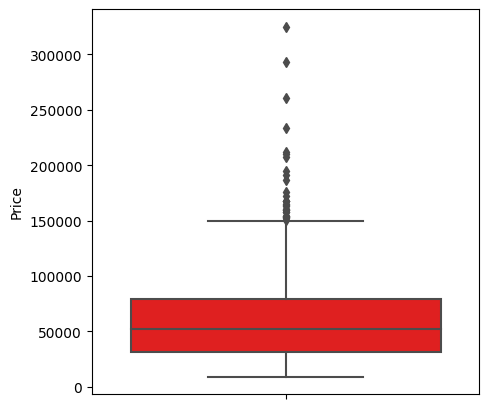

In [318]:
# viewing the distribution of the price column
plt.figure(figsize=(5,5))
sns.boxplot(y='Price', data = df,color='red')
plt.show()

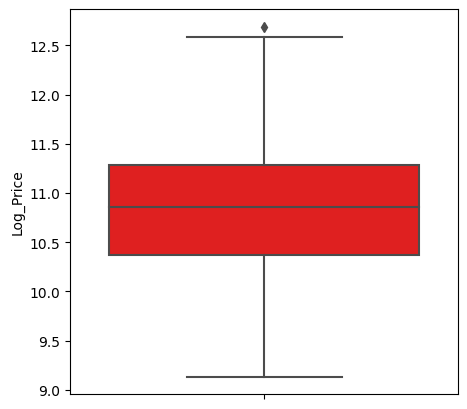

In [319]:
# Calculating and viewing the distribution of the 'Log_Price' column
df['Log_Price'] = np.log(df['Price'])
plt.figure(figsize=(5,5))
sns.boxplot(y='Log_Price', data = df, color='red')
plt.show()

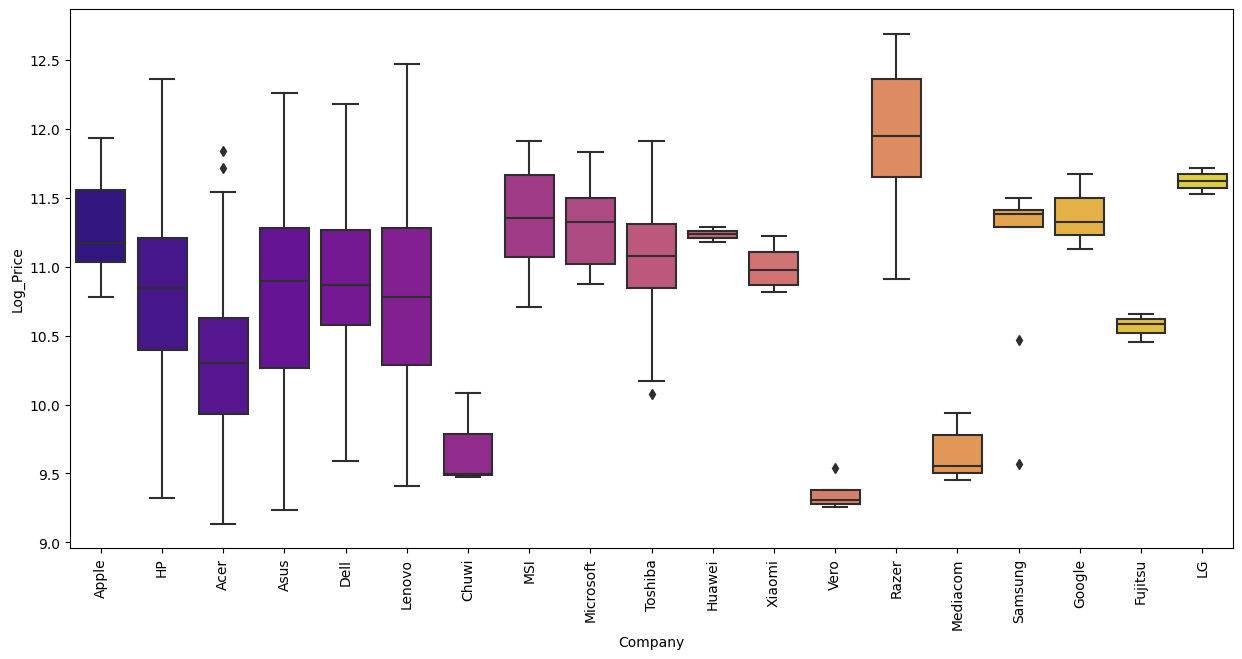

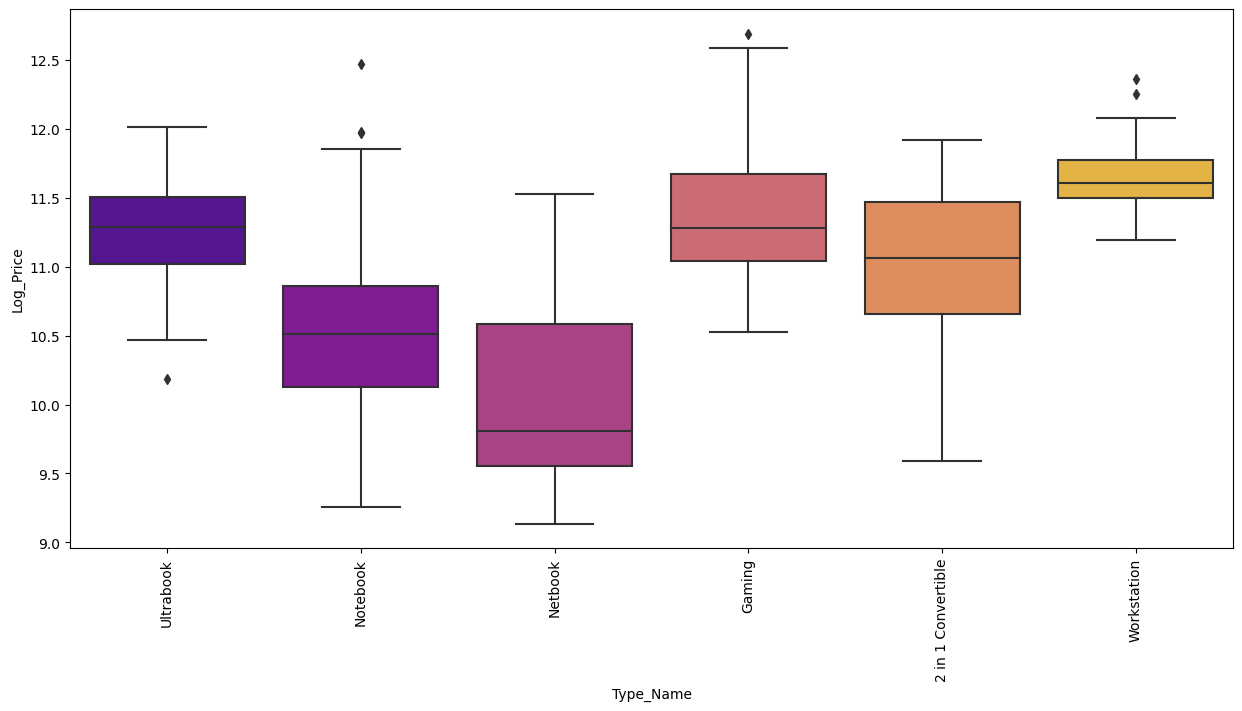

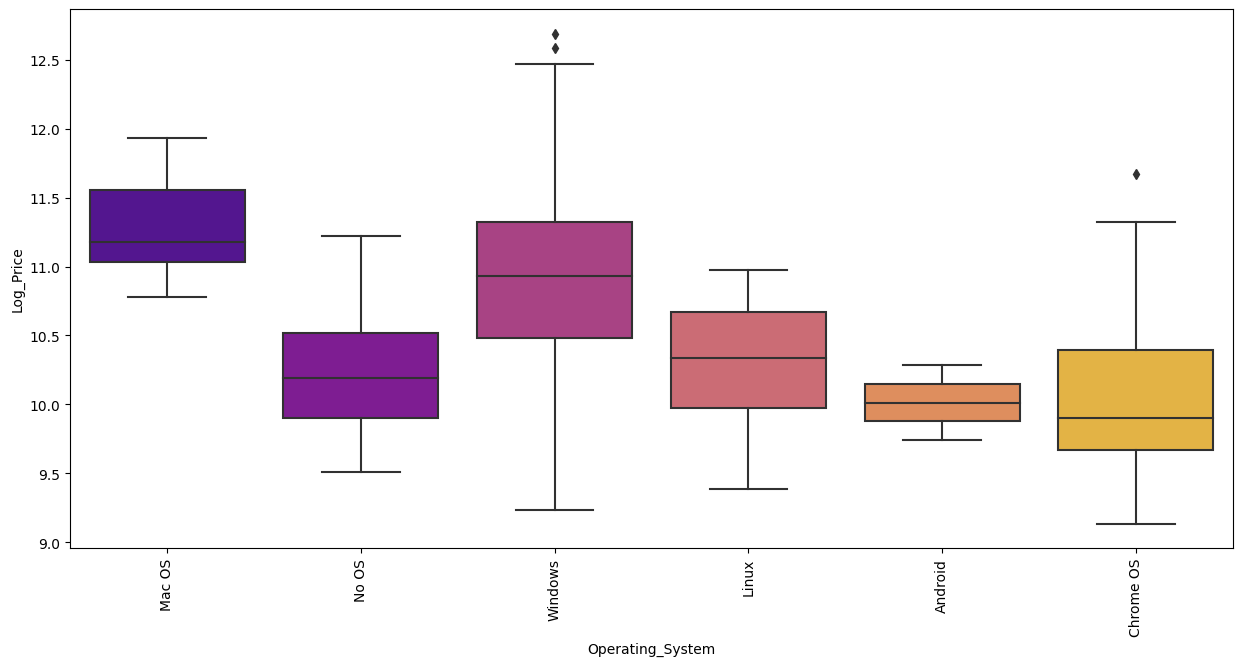

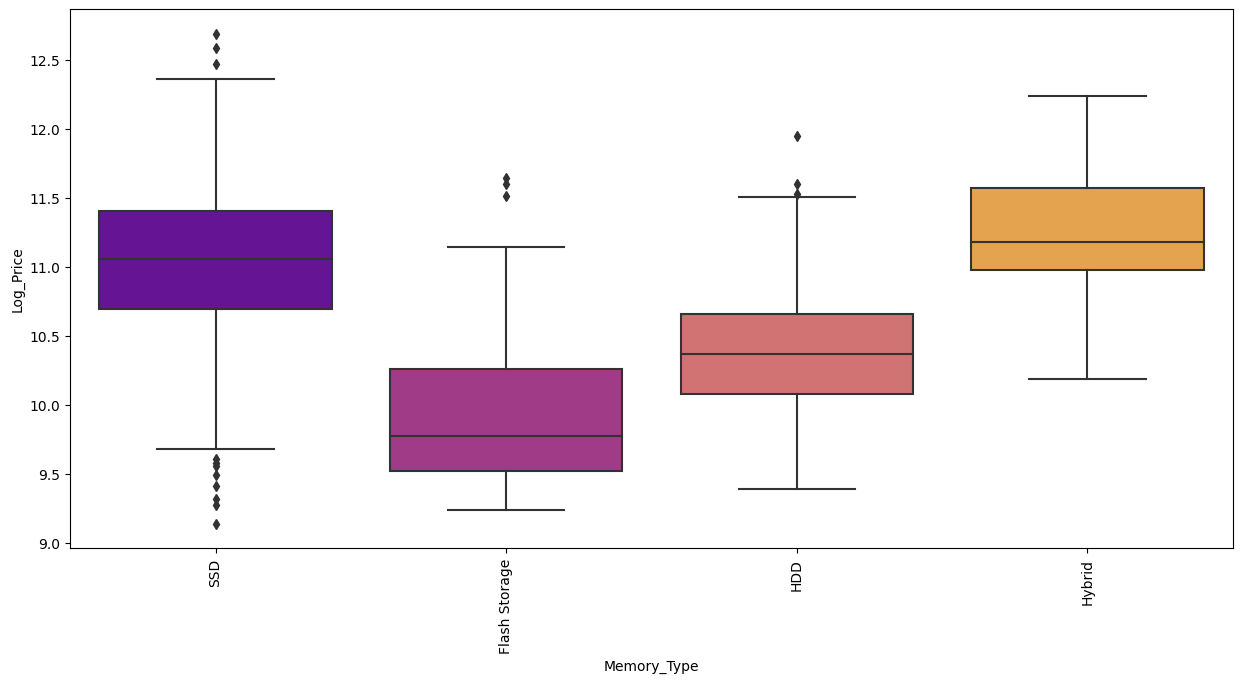

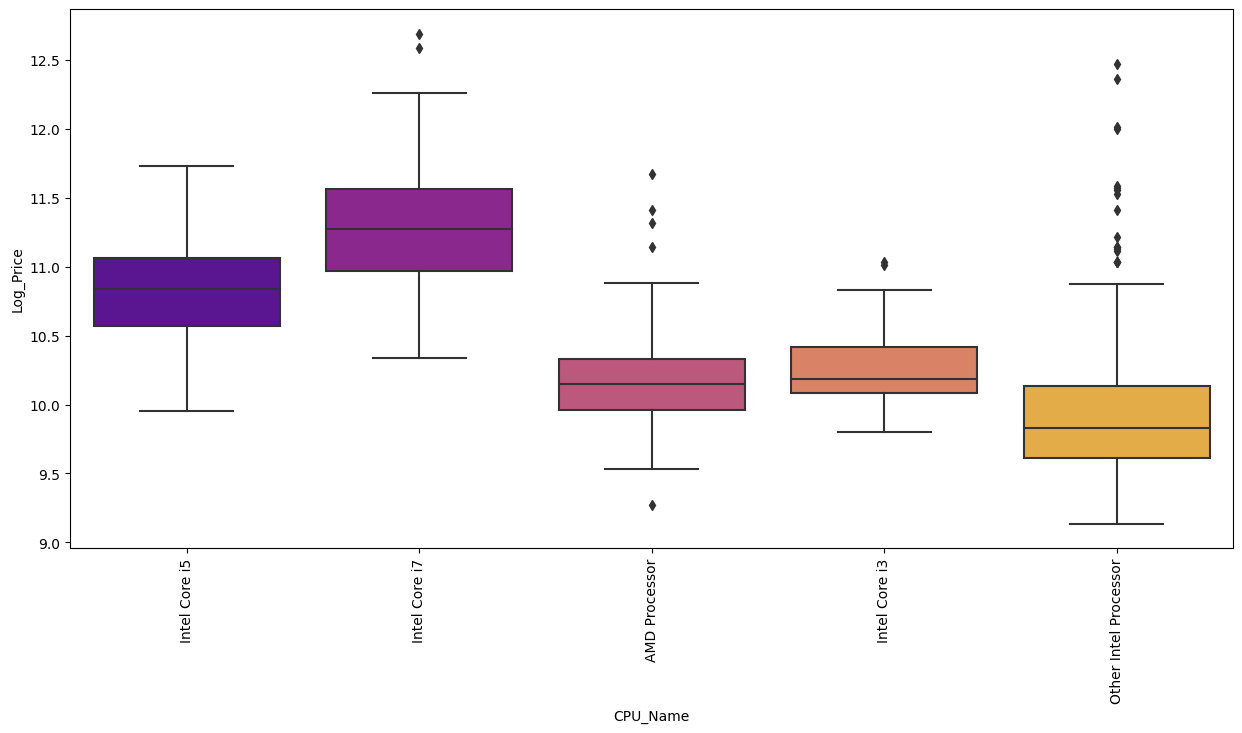

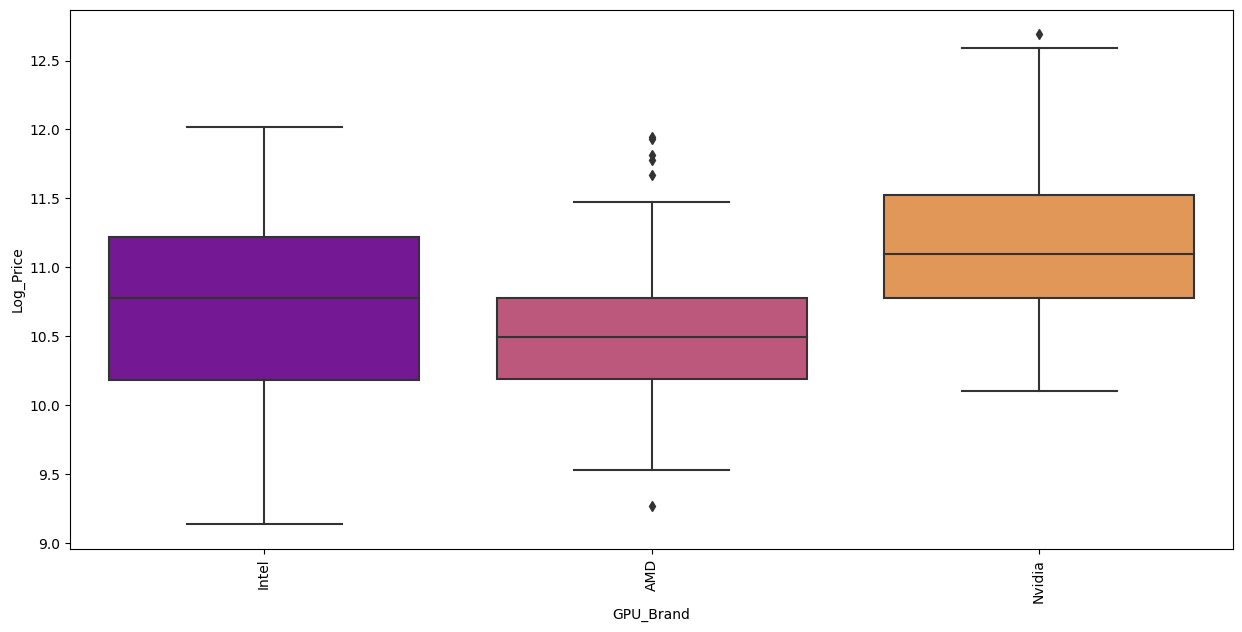

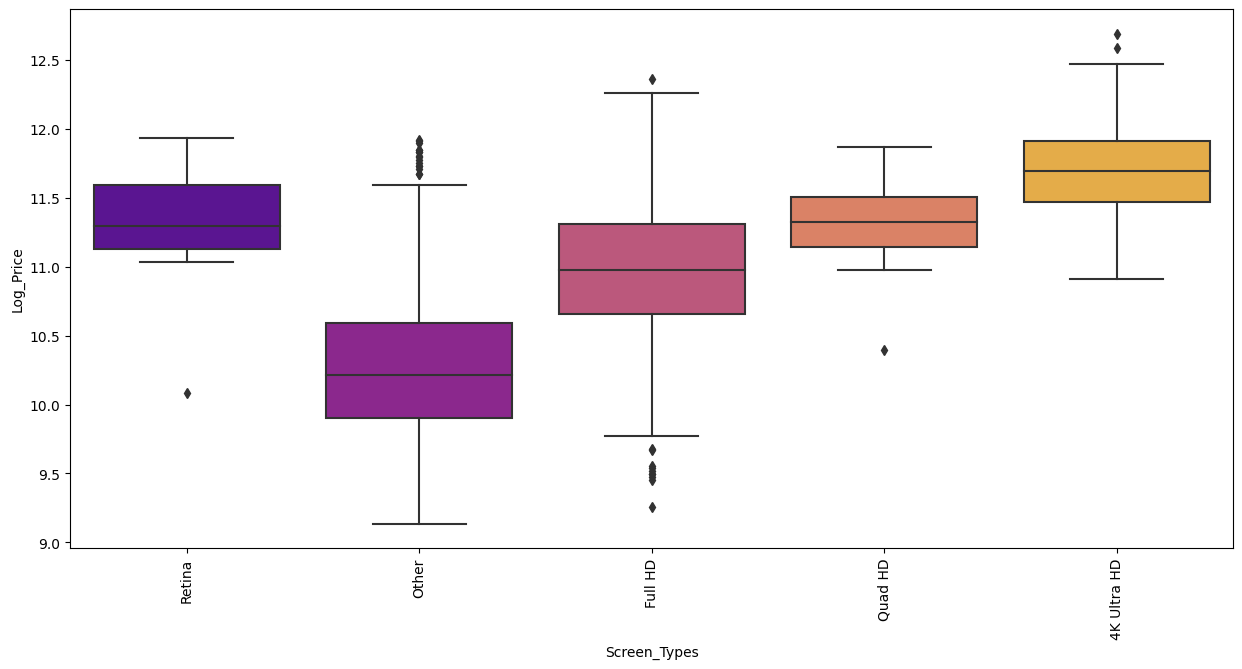

In [320]:
## Plotting boxplots for the categorical variables versus 'Price'

def draw_box_plot(col):
    plt.figure(figsize=(15,7))
    sns.boxplot(x=col, y='Log_Price', data = df, palette='plasma')
    #plt.title="Distribution of col"
    plt.xticks(rotation='vertical')
    plt.show()

for col in df_cat_vars.columns:
    draw_box_plot(col)

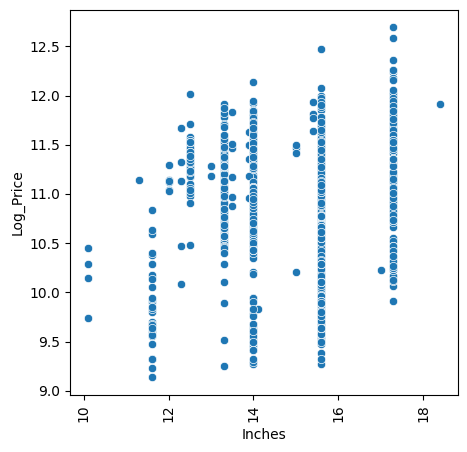

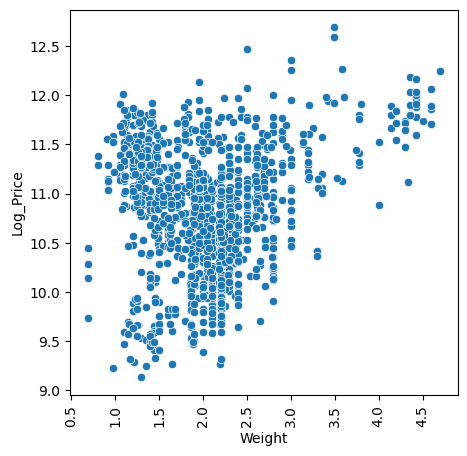

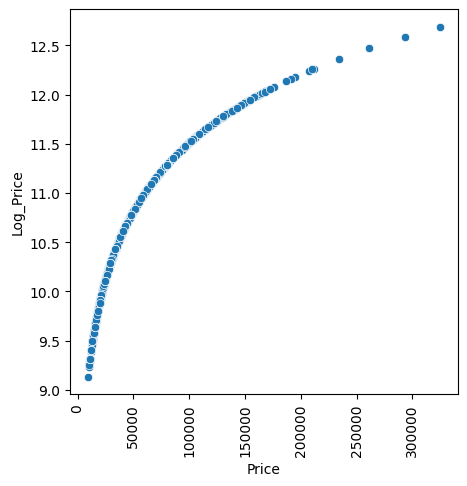

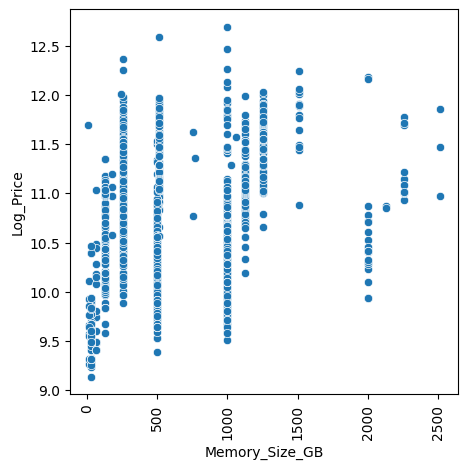

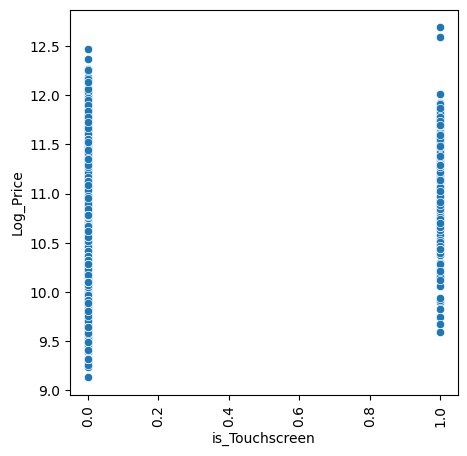

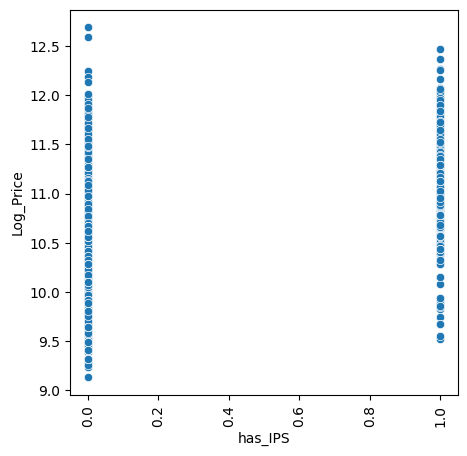

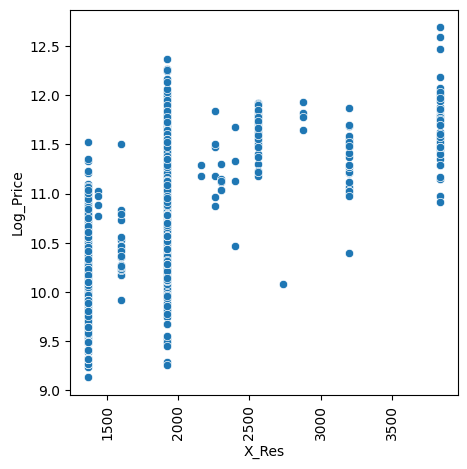

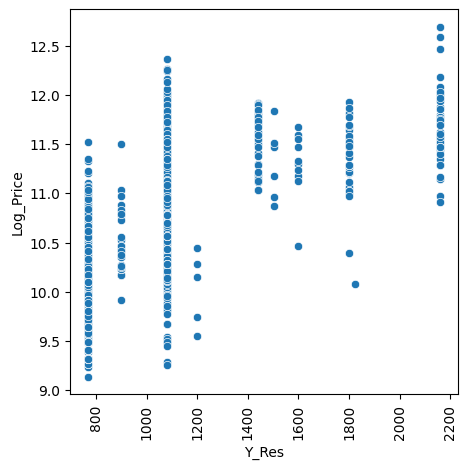

In [321]:
## Plotting scatterplots for the numeric variables versus 'Price'

def draw_scatter_plot(col):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=col, y='Log_Price', data = df)
    #plt.title="Distribution of col"
    plt.xticks(rotation='vertical')
    plt.show()

for col in df_num_vars.columns:
    draw_scatter_plot(col)

In [322]:
df_num_vars.columns

Index(['Inches', 'Weight', 'Price', 'Memory_Size_GB', 'is_Touchscreen',
       'has_IPS', 'X_Res', 'Y_Res'],
      dtype='object')

In [323]:
df[['Inches', 'Weight', 'Price', 'Log_Price', 'Memory_Size_GB', 'X_Res', 'Y_Res']].corr()

,Inches,Weight,Price,Log_Price,Memory_Size_GB,X_Res,Y_Res
Inches,1.000000,0.827631,0.068197,0.044329,0.538358,-0.071245,-0.095404
Weight,0.827631,1.000000,0.210370,0.151674,0.549754,-0.032880,-0.053846
Price,0.068197,0.210370,1.000000,0.927581,0.160819,0.556529,0.552809
Log_Price,0.044329,0.151674,0.927581,1.000000,0.160004,0.552200,0.549402
Memory_Size_GB,0.538358,0.549754,0.160819,0.160004,1.000000,0.071531,0.056959
X_Res,-0.071245,-0.032880,0.556529,0.552200,0.071531,1.000000,0.994219
Y_Res,-0.095404,-0.053846,0.552809,0.549402,0.056959,0.994219,1.000000


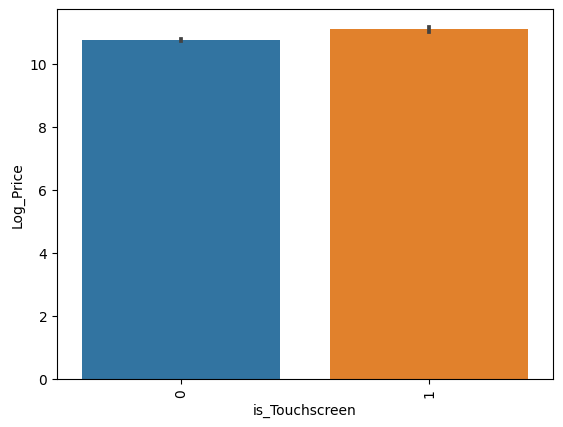

In [324]:
# Touchscreen on comparison with 'Price' of laptop

sns.barplot(x = 'is_Touchscreen',y = 'Log_Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

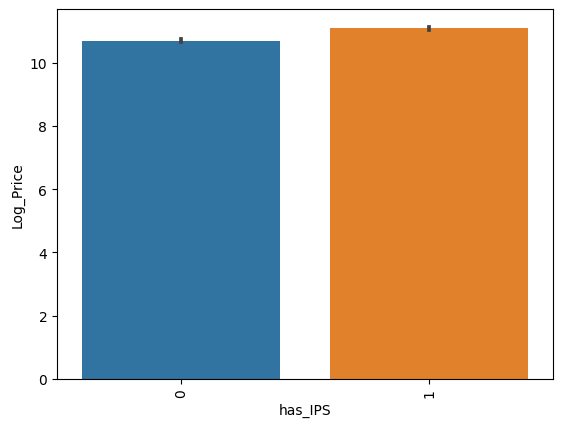

In [325]:
sns.barplot(x = 'has_IPS',y = 'Log_Price', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

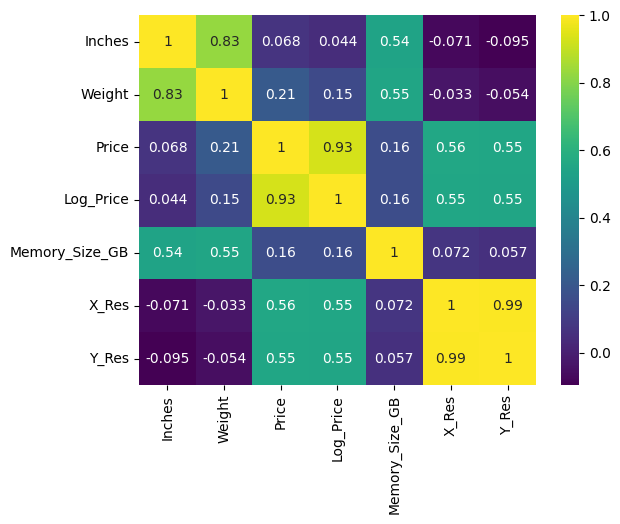

In [326]:
sns.heatmap(df[['Inches', 'Weight', 'Price', 'Log_Price','Memory_Size_GB', 'X_Res', 'Y_Res']].corr(),
            annot = True, cmap = 'viridis')
plt.show()

**From the correlation plot we observe that 'X_Res' and 'Y_Res' have a positive correlation with 'Price', i.e., as 'X_Res' or 'Y_Res' increasing,'Price' of the laptop is also increases.**

## Create feature Pixel Per Inch: 'PPI'

#### 'X_Res' and 'Y_Res' are collinear,so we can combine them with 'Inches' to get a new column named 'PPI' for {Pixels per Inch}

#### 'PPI' {pixels per inch} is given by:
$$
    \text{PPI(pixels per inch)} = \frac{\sqrt{X_\text{Res}^2+Y_{\text{Res}}^2}}{\text{inches}}
$$


In [327]:
# Calculate the PPI with formula
df['PPI'] = (((df['X_Res'] ** 2 + df['Y_Res'] ** 2) ** 0.5) / df['Inches']).astype(float)

# Round the 'PPI' values to 2 decimal places (adjust the number of decimal places as needed)
df['PPI'] = df['PPI'].round(2)

# Display the updated DataFrame
df.head()



,Company,Type_Name,Inches,Operating_System,Weight,Price,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS,X_Res,Y_Res,Screen_Types,Log_Price,PPI
0,Apple,Ultrabook,13.3,Mac OS,1.37,71378.6832,128,SSD,Intel Core i5,Intel,0,1,2560,1600,Retina,11.175755,226.98
1,Apple,Ultrabook,13.3,Mac OS,1.34,47895.5232,128,Flash Storage,Intel Core i5,Intel,0,0,1440,900,Other,10.776777,127.68
2,HP,Notebook,15.6,No OS,1.86,30636.0000,256,SSD,Intel Core i5,Intel,0,0,1920,1080,Full HD,10.329931,141.21
3,Apple,Ultrabook,15.4,Mac OS,1.83,135195.3360,512,SSD,Intel Core i7,AMD,0,1,2880,1800,Retina,11.814476,220.53
4,Apple,Ultrabook,13.3,Mac OS,1.37,96095.8080,256,SSD,Intel Core i5,Intel,0,1,2560,1600,Retina,11.473101,226.98


In [328]:
df[['Inches', 'Weight', 'Price', 'Log_Price', 'Memory_Size_GB', 'X_Res', 'Y_Res','PPI']].corr()['Log_Price']

Inches            0.044329
Weight            0.151674
Price             0.927581
Log_Price         1.000000
Memory_Size_GB    0.160004
X_Res             0.552200
Y_Res             0.549402
PPI               0.483148
Name: Log_Price, dtype: float64

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop 'Inches','X_Res', and 'Y_Res'**

In [329]:
df.drop(columns=['Inches','X_Res','Y_Res', 'Price'],inplace=True)
df.head()

,Company,Type_Name,Operating_System,Weight,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS,Screen_Types,Log_Price,PPI
0,Apple,Ultrabook,Mac OS,1.37,128,SSD,Intel Core i5,Intel,0,1,Retina,11.175755,226.98
1,Apple,Ultrabook,Mac OS,1.34,128,Flash Storage,Intel Core i5,Intel,0,0,Other,10.776777,127.68
2,HP,Notebook,No OS,1.86,256,SSD,Intel Core i5,Intel,0,0,Full HD,10.329931,141.21
3,Apple,Ultrabook,Mac OS,1.83,512,SSD,Intel Core i7,AMD,0,1,Retina,11.814476,220.53
4,Apple,Ultrabook,Mac OS,1.37,256,SSD,Intel Core i5,Intel,0,1,Retina,11.473101,226.98


## Data Preprocessing & Model Building

In [330]:
y = df['Log_Price']
X = df.drop(['Log_Price'],axis = 1)


In [331]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=112)

X_train.shape,X_test.shape

((1107, 12), (196, 12))

**Create index numbers of the columns for preprocessing in a Pipeline using the 'Column Transfomer' class**

In [333]:
# Mapper using dictionary comprehension and enumerate
mapper = {index: column_name for index, column_name in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'Type_Name',
 2: 'Operating_System',
 3: 'Weight',
 4: 'Memory_Size_GB',
 5: 'Memory_Type',
 6: 'CPU_Name',
 7: 'GPU_Brand',
 8: 'is_Touchscreen',
 9: 'has_IPS',
 10: 'Screen_Types',
 11: 'PPI'}

### Linear Regression

In [334]:
# we will apply one hot encoding on the columns with this indices-->[0,1,2,5,6,7,10]
# the remainder we keep as passthrough i.e no other col must get affected
# except the ones undergoing the transformation!

# Define the columns for which One Hot Encoding will be applied
columns_to_one_hot_encode = [0, 1, 2, 5, 6, 7, 10]
# Define the columns for which One Scaling will be applied
columns_to_scale = [3,4,11]

# Create the ColumnTransformer for One Hot Encoding and StandardScaler
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_one_hot_encode),
    ('scaler', StandardScaler(), columns_to_scale)],
                          remainder='passthrough')

# The rest of the code remains the same
step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
mae = np.exp(metrics.mean_absolute_error(y_test, y_pred))
rmse= np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 score = {r2}')
print(f'MAE = {mae}')
print(f'RMSE = {rmse}')



R2 score = 0.7803434230465784
MAE = 1.24897102816673
RMSE = 1.3434272796346935


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**The Root Mean Squared Error (RMSE) implies: The predicted prices are on average about 1.34 from the original price using Linear Regression. About 95% of all laptop prices are predicted to be within +/-2.69 from the original price.**

**The R2 score implies: About 78.1% of the total variation in prices is explained by the Linear Regression model. The higher the better.**


### Ridge Regression

In [335]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation!

# Create the ColumnTransformer for One Hot Encoding and StandardScaler
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_one_hot_encode),
    ('scaler', StandardScaler(), columns_to_scale)],
                          remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
mae = np.exp(metrics.mean_absolute_error(y_test, y_pred))
rmse= np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 score = {r2}')
print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

R2 score = 0.7841014306103764
MAE = 1.2492898180062226
RMSE = 1.3400242304486836


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### LassoRegression

In [336]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation!

# Create the ColumnTransformer for One Hot Encoding and StandardScaler
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_one_hot_encode),
    ('scaler', StandardScaler(), columns_to_scale)],
                          remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
mae = np.exp(metrics.mean_absolute_error(y_test, y_pred))
rmse= np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 score = {r2}')
print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

R2 score = 0.7748609867524446
MAE = 1.2530468448268492
RMSE = 1.348355336320068


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Decision Tree

In [337]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation!

# Create the ColumnTransformer for One Hot Encoding and StandardScaler
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_one_hot_encode),
    ('scaler', StandardScaler(), columns_to_scale)],
                          remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
mae = np.exp(metrics.mean_absolute_error(y_test, y_pred))
rmse= np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 score = {r2}')
print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score = 0.777626191427867
MAE = 1.2560997663219187
RMSE = 1.345875084271207


### Random Forest

In [338]:
# Create the ColumnTransformer for One Hot Encoding and StandardScaler
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_one_hot_encode),
    ('scaler', StandardScaler(), columns_to_scale)],
                          remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
mae = np.exp(metrics.mean_absolute_error(y_test, y_pred))
rmse= np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 score = {r2}')
print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score = 0.8611991669218508
MAE = 1.1965934113393881
RMSE = 1.2645037489311575


**The Root Mean Squared Error (RMSE) implies: The predicted prices are on average about 1.26 from the original price using Random Forest Regression. About 95% of all laptop prices are predicted to be within +/-2.53 from the original price.**

**The R2 score implies: About 86.1% of the total variation in prices is explained by Random Forest Regression.**

**The model is better than the prior ones and we adopt it for predictions.**


In [339]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [340]:
X.head()

,Company,Type_Name,Operating_System,Weight,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS,Screen_Types,PPI
0,Apple,Ultrabook,Mac OS,1.37,128,SSD,Intel Core i5,Intel,0,1,Retina,226.98
1,Apple,Ultrabook,Mac OS,1.34,128,Flash Storage,Intel Core i5,Intel,0,0,Other,127.68
2,HP,Notebook,No OS,1.86,256,SSD,Intel Core i5,Intel,0,0,Full HD,141.21
3,Apple,Ultrabook,Mac OS,1.83,512,SSD,Intel Core i7,AMD,0,1,Retina,220.53
4,Apple,Ultrabook,Mac OS,1.37,256,SSD,Intel Core i5,Intel,0,1,Retina,226.98


In [341]:
X.to_csv('training_data.csv',index=None)

## Hyperparameter Tuning for Random Forest

In [342]:
indexlist = columns_to_one_hot_encode
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['Company',
 'Type_Name',
 'Operating_System',
 'Memory_Type',
 'CPU_Name',
 'GPU_Brand',
 'Screen_Types']

In [343]:
X_df = pd.get_dummies(X,columns=transformlist, drop_first=True)
X_df.head()

,Weight,Memory_Size_GB,is_Touchscreen,has_IPS,PPI,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,CPU_Name_Intel Core i3,CPU_Name_Intel Core i5,CPU_Name_Intel Core i7,CPU_Name_Other Intel Processor,GPU_Brand_Intel,GPU_Brand_Nvidia,Screen_Types_Full HD,Screen_Types_Other,Screen_Types_Quad HD,Screen_Types_Retina
0,1.37,128,0,1,226.98,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,1.34,128,0,0,127.68,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1.86,256,0,0,141.21,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,1.83,512,0,1,220.53,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.37,256,0,1,226.98,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [344]:
X_train, X_test, y_train, y_test = train_test_split(X_df,y,
                                                   test_size=0.15,random_state=112)

X_train.shape,X_test.shape

((1107, 46), (196, 46))

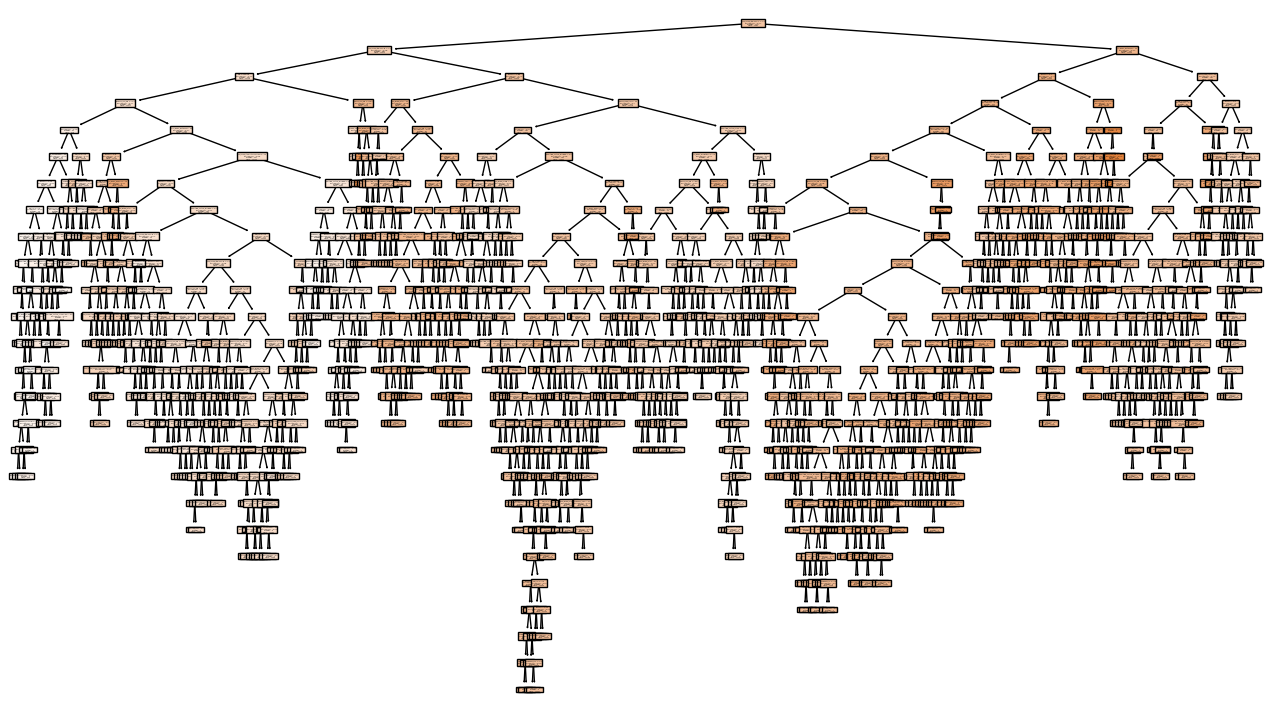

In [345]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=X_df.columns)
plt.show()

In [346]:
# Cost complexity pruning for preventing overfitting
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [347]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state = 0, ccp_alpha = alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

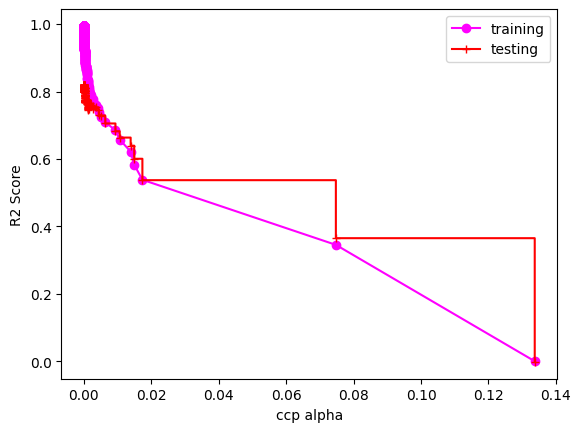

In [348]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('R2 Score')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

**Possible values of alpha can lie between `[0.0025-->0.0075]`**

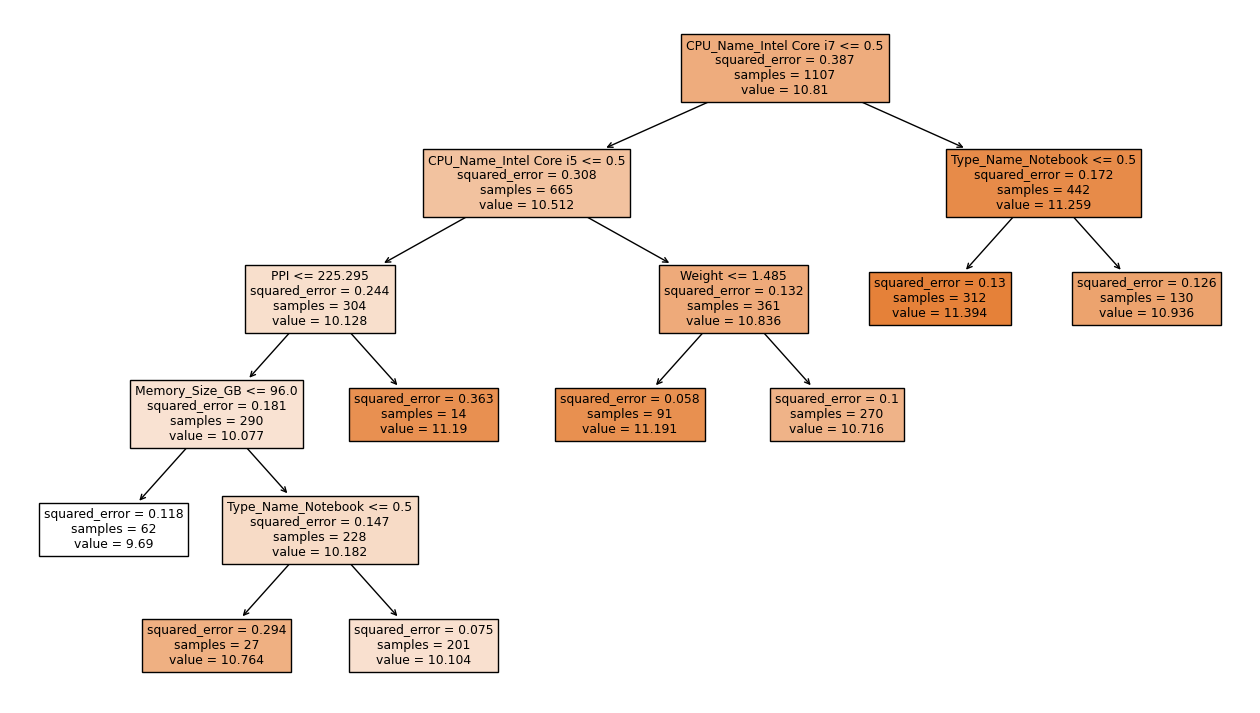

In [349]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0075)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=X_df.columns)
plt.show()

In [350]:
y_pred = reg.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
mae = np.exp(metrics.mean_absolute_error(y_test, y_pred))
rmse= np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 score = {r2}')
print(f'MAE = {mae}')
print(f'RMSE = {rmse}')

R2 score = 0.705196161532266
MAE = 1.309524512091304
RMSE = 1.4077825197562892


### Define Parameters to Tune for a Random Forest and a Decision Tree

**This process takes long and needs high computational power**

In [351]:
params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [int(x) for x in np.linspace(100, 1200, 10)],
            'criterion': ['squared_error', 'absolute_error', 'poisson'],
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'mae'],
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2', None],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    }
}


In [352]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

params = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [int(x) for x in np.linspace(100, 1200, 10)],
            'criterion': ['squared_error', 'absolute_error', 'poisson'],
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],  # Remove 'mse' and 'mae'
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2', None],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    }
}

scores = []
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                             param_distributions=mp['params'],
                             cv=5,
                             n_iter=10,
                             n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': modelname,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [353]:

scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df


,model_name,best_score,best_estimator
0,NaN,0.786421,NaN
1,NaN,0.678000,NaN


In [354]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.705196161532266


## Prediction on the whole Dataset

In [355]:
# Convert the DataFrame X_df to a NumPy array
testtrain = np.array(X_df)

# Use vectorized prediction
predicted = rf.predict(testtrain)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [356]:
# Apply the exponential transformation to the entire 'predicted' array at once
ans = np.exp(predicted)


In [357]:
df['Predicted_Price'] = np.array(ans)
df['Price'] = np.exp(df['Log_Price'])
df

,Company,Type_Name,Operating_System,Weight,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS,Screen_Types,Log_Price,PPI,Predicted_Price,Price
0,Apple,Ultrabook,Mac OS,1.37,128,SSD,Intel Core i5,Intel,0,1,Retina,11.175755,226.98,70724.441928,71378.6832
1,Apple,Ultrabook,Mac OS,1.34,128,Flash Storage,Intel Core i5,Intel,0,0,Other,10.776777,127.68,68315.043917,47895.5232
2,HP,Notebook,No OS,1.86,256,SSD,Intel Core i5,Intel,0,0,Full HD,10.329931,141.21,43946.188837,30636.0000
3,Apple,Ultrabook,Mac OS,1.83,512,SSD,Intel Core i7,AMD,0,1,Retina,11.814476,220.53,96819.564061,135195.3360
4,Apple,Ultrabook,Mac OS,1.37,256,SSD,Intel Core i5,Intel,0,1,Retina,11.473101,226.98,72803.824257,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Windows,1.80,128,SSD,Intel Core i7,Intel,1,1,Full HD,10.433899,157.35,78275.256115,33992.6400
1299,Lenovo,2 in 1 Convertible,Windows,1.30,512,SSD,Intel Core i7,Intel,1,1,Quad HD,11.288115,276.05,97552.466172,79866.7200
1300,Lenovo,Notebook,Windows,1.50,64,Flash Storage,Other Intel Processor,Intel,0,0,Other,9.409283,111.94,16663.616396,12201.1200
1301,HP,Notebook,Windows,2.19,1000,HDD,Intel Core i7,AMD,0,0,Other,10.614129,100.45,42404.814916,40705.9200


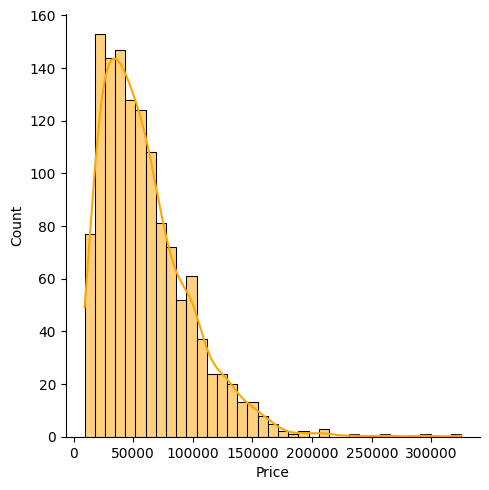

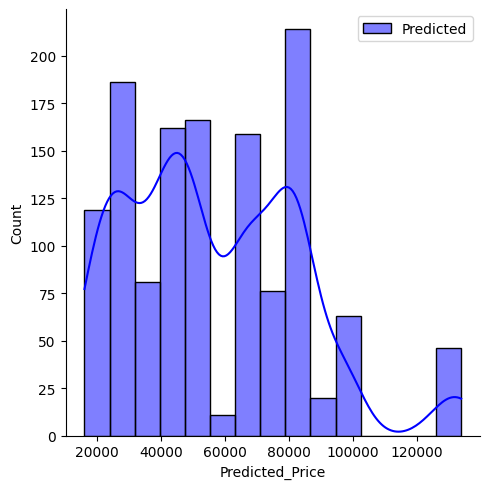

In [358]:
sns.displot(x='Price', data=df, color='orange', kde=True, label='Actual')
sns.displot(x='Predicted_Price', data=df, color='blue', kde=True, label='Predicted')
plt.legend()
plt.show()

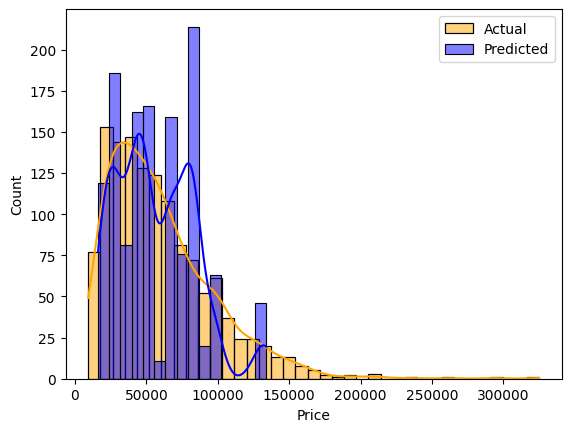

In [359]:
# Plot the histogram curves of 'Price' and 'Predicted_Price' on the same plot
sns.histplot(data=df, x='Price', color='orange', kde=True, label='Actual')
sns.histplot(data=df, x='Predicted_Price', color='blue', kde=True, label='Predicted')

plt.legend()
plt.show()

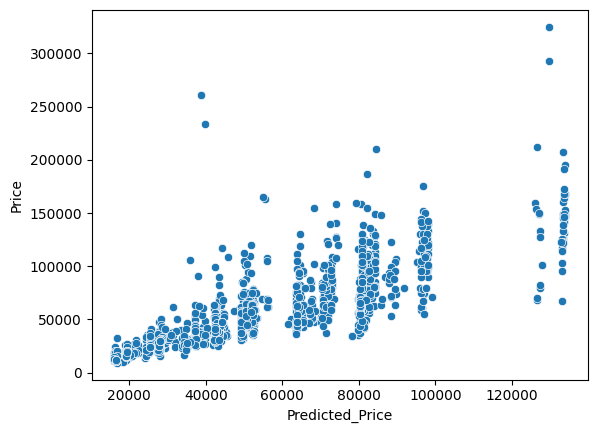

In [360]:
sns.scatterplot(x='Predicted_Price', y='Price', data=df)
plt.show()

In [361]:
df[['Predicted_Price','Price']].corr()

,Predicted_Price,Price
Predicted_Price,1.000000,0.807501
Price,0.807501,1.000000


# Random Forest Regressor version_2

In [362]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8606854578399032


In [363]:
# Convert the DataFrame X_df to a NumPy array
testtrain = np.array(X_df)

# Use vectorized prediction
predicted = rf.predict(testtrain)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [364]:
# Apply the exponential transformation to the entire 'predicted' array at once
ans = np.exp(predicted)


In [365]:
data = df.copy()
data['Predicted_Price'] = np.array(ans)
data

,Company,Type_Name,Operating_System,Weight,Memory_Size_GB,Memory_Type,CPU_Name,GPU_Brand,is_Touchscreen,has_IPS,Screen_Types,Log_Price,PPI,Predicted_Price,Price
0,Apple,Ultrabook,Mac OS,1.37,128,SSD,Intel Core i5,Intel,0,1,Retina,11.175755,226.98,70724.441928,71378.6832
1,Apple,Ultrabook,Mac OS,1.34,128,Flash Storage,Intel Core i5,Intel,0,0,Other,10.776777,127.68,68315.043917,47895.5232
2,HP,Notebook,No OS,1.86,256,SSD,Intel Core i5,Intel,0,0,Full HD,10.329931,141.21,43946.188837,30636.0000
3,Apple,Ultrabook,Mac OS,1.83,512,SSD,Intel Core i7,AMD,0,1,Retina,11.814476,220.53,96819.564061,135195.3360
4,Apple,Ultrabook,Mac OS,1.37,256,SSD,Intel Core i5,Intel,0,1,Retina,11.473101,226.98,72803.824257,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Windows,1.80,128,SSD,Intel Core i7,Intel,1,1,Full HD,10.433899,157.35,78275.256115,33992.6400
1299,Lenovo,2 in 1 Convertible,Windows,1.30,512,SSD,Intel Core i7,Intel,1,1,Quad HD,11.288115,276.05,97552.466172,79866.7200
1300,Lenovo,Notebook,Windows,1.50,64,Flash Storage,Other Intel Processor,Intel,0,0,Other,9.409283,111.94,16663.616396,12201.1200
1301,HP,Notebook,Windows,2.19,1000,HDD,Intel Core i7,AMD,0,0,Other,10.614129,100.45,42404.814916,40705.9200


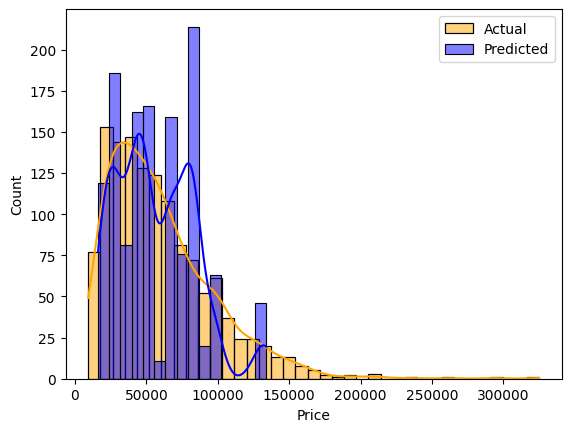

In [366]:
# Plot the histogram curves of 'Price' and 'Predicted_Price' on the same plot
sns.histplot(data=df, x='Price', color='orange', kde=True, label='Actual')
sns.histplot(data=df, x='Predicted_Price', color='blue', kde=True, label='Predicted')

plt.legend()
plt.show()

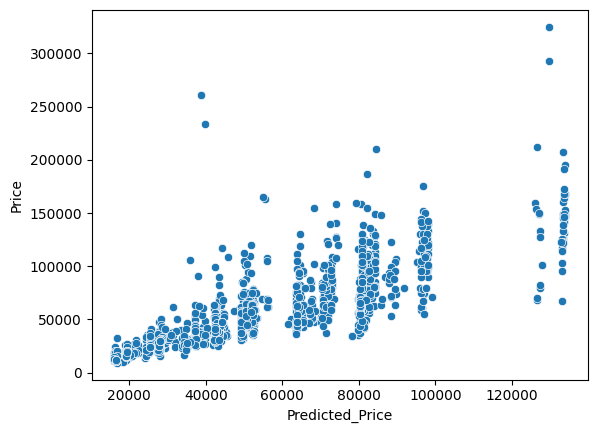

In [367]:
sns.scatterplot(x='Predicted_Price', y='Price', data=df)
plt.show()

In [368]:
df[['Predicted_Price','Price']].corr()

,Predicted_Price,Price
Predicted_Price,1.000000,0.807501
Price,0.807501,1.000000


In [369]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()